In [8]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv('./cleandata.csv')

#Change data types

# Map the data types for each column
dtypes_mapping = {
'ID'                                  : 'str',
'Age'                                 : 'object',
'Residence'                           : 'category',
'V-SE-Power'                          : 'int',
'V-SE-Achievement'                   : 'int',
'AVG-V-Self-Enhacemen'                : 'float',
'V-O-Hedonism'                         : 'int',
'V-O-Stimulation'                       : 'int',
'V-O-Self_direction'                    : 'int',
'AVG-V-Openness_to_change'            : 'float',
'V-ST-Universalism'                     : 'int',
'V-ST-Benevolence'                      : 'int',
'AVG-V-Self_transcendence'            : 'float',
'V-C-Tradition'                         : 'int',
'V-C-Conformity'                        : 'int',
'V-C-Security'                          : 'int',
'AVG-V-Conservation'                  : 'float',
'P-OX-Aesthetic_appreciation'            : 'int',
'P-OX-Inquisitiveness'                   : 'int',
'P-OX-Creativity'                        : 'int',                  
'P-OX-Unconventionality'                 : 'int',
'P-E-Liveliness'                        : 'int',
'AVG-P-Opennes_to_experience'           : 'int',
'P-E-Social_self-esteem'                : 'int',
'P-E-Social_boldness'                   : 'int',
'P-E-Sociability'                       : 'int',
'AVG-P-Extraversion'                  : 'float',
'P-HH-Modesty'                          : 'int',
'P-HH-Greed avoidance'                  : 'int',
'P-HH-Fairness'                         : 'int',
'P-HH-Sincerity'                        : 'int',
'AVG-P-Honesty-Humility'              : 'float',
'ATT-Favourable'                        : 'int',
'ATT-Smart'                             : 'int',
'AVG-ATT'                             : 'float',
'BEH-take_part'                         : 'int',
'BEH-passenger-usage'                 : 'int',
'PARTIC-YES-passenger-explanation'    : 'str',
'BEH-driver-usage'                    : 'int',
'PARTIC-YES-driver-explanation'        : 'str',
'INT-passenger'                       : 'int',
'INT-passenger-explanation'            : 'str',
'INT-driver'                         : 'int',
'INT-driver-explanation'               : 'str',
}

# Use astype to apply the data type changes
df = df.astype(dtypes_mapping)

print("\nData Types for Each Column:")
print(df.dtypes)



Data Types for Each Column:
ID                                    object
Age                                   object
Residence                           category
V-SE-Power                             int64
V-SE-Achievement                       int64
AVG-V-Self-Enhacemen                 float64
V-O-Hedonism                           int64
V-O-Stimulation                        int64
V-O-Self_direction                     int64
AVG-V-Openness_to_change             float64
V-ST-Universalism                      int64
V-ST-Benevolence                       int64
AVG-V-Self_transcendence             float64
V-C-Tradition                          int64
V-C-Conformity                         int64
V-C-Security                           int64
AVG-V-Conservation                   float64
P-OX-Aesthetic_appreciation            int64
P-OX-Inquisitiveness                   int64
P-OX-Creativity                        int64
P-OX-Unconventionality                 int64
AVG-P-Opennes_to_experienc

In [26]:
import pandas as pd

# Assuming df is your original DataFrame
# dtypes_mapping is the dictionary you provided

# Create a copy of the original DataFrame with the specified data types
df_filtered = df.astype(dtypes_mapping.copy())

# Columns of interest
columns_of_interest = ['INT-driver-explanation', 'INT-passenger-explanation', 'PARTIC-YES-driver-explanation', 'PARTIC-YES-passenger-explanation']

# Filter the DataFrame based on non-null values and non-"nan" strings in specified columns
condition = (df_filtered[columns_of_interest].notnull().all(axis=1)) & (~df_filtered[columns_of_interest].astype(str).eq('nan').any(axis=1))
df_filtered = df_filtered[condition]

# Drop rows with 'nan' values
df_filtered = df_filtered.dropna()

# Display the filtered DataFrame
print(df_filtered)

# Save the cleaned DataFrame to cleandata.csv
df_filtered.to_csv('text.csv', index=False)



           ID    Age Residence  V-SE-Power  V-SE-Achievement  \
0    1,12E+15  25-34  Slovenia           2                 3   
2    1,11E+15  35-44  Slovenia           3                 5   
3    1,11E+15  25-34   Germany           3                 5   
5    1,11E+14  35-44   Croatia           1                 5   
8    1,11E+15  25-34   Austria           8                 1   
..        ...    ...       ...         ...               ...   
171  1,11E+15  55-64  Slovenia           2                 5   
172  1,11E+15  35-44  Slovenia           3                 4   
173  1,11E+15  35-44  Slovenia           4                 2   
175  1,11E+15  55-64  Slovenia           5                 5   
177  1,11E+15  18-24  Slovenia           3                 5   

     AVG-V-Self-Enhacemen  V-O-Hedonism  V-O-Stimulation  V-O-Self_direction  \
0                     2.5             3                5                   9   
2                     4.0             7                5               

AGE

In [27]:
import pandas as pd

# Assuming df is your DataFrame
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age'] = pd.Categorical(df['Age'], categories=age_categories, ordered=True)

# Use describe to get descriptive statistics
descriptive_stats = df['Age'].describe()

# Print the results
print(descriptive_stats)

count       178
unique        6
top       25-34
freq         91
Name: Age, dtype: object


In [36]:
# Calculate the frequency of values in the "Age" column
age_frequency = df['Age'].value_counts()

# Calculate the percentage of frequency
age_percentage = (age_frequency / len(df)) * 100

# Calculate the cumulative percentage
cumulative_percentage = age_percentage.cumsum()

# Create a DataFrame with Age, Frequency, Percentage, and Cumulative Percentage
age_summary_df = pd.DataFrame({'Age': age_frequency.index, 'Frequency': age_frequency.values, 'Percentage': age_percentage.values, 'Cumulative Percentage': cumulative_percentage.values})

# Print the results
print("Frequency, Percentage, and Cumulative Percentage of Age:")
print(age_summary_df)

# Save the cleaned DataFrame to cleandata.csv
age_summary_df.to_csv('age.csv', index=False)
print("\nDataFrame has been saved as age.csv")

Frequency, Percentage, and Cumulative Percentage of Age:
     Age  Frequency  Percentage  Cumulative Percentage
0  25-34          1   16.666667              16.666667
1  35-44          1   16.666667              33.333333
2  45-54          1   16.666667              50.000000
3  18-24          1   16.666667              66.666667
4  55-64          1   16.666667              83.333333
5    65+          1   16.666667             100.000000

DataFrame has been saved as age.csv


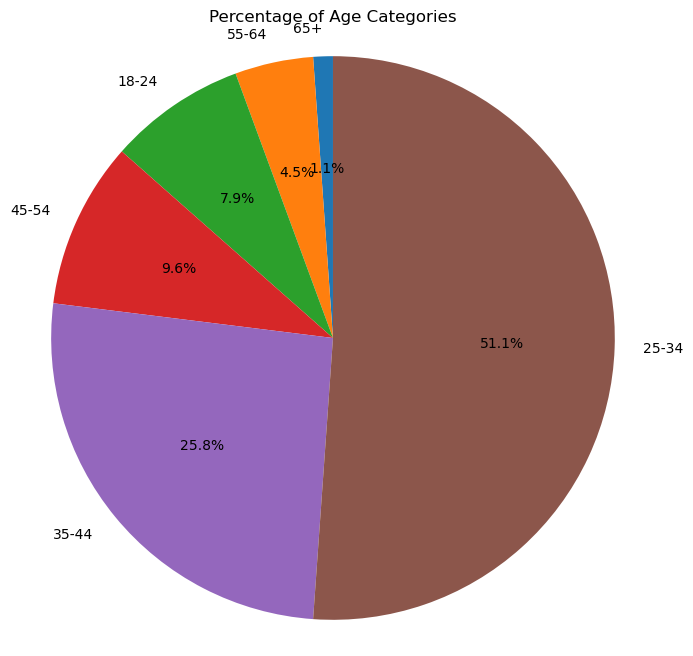

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
data_age = {
    'Age': ['25-34', '35-44', '45-54', '18-24', '55-64', '65+'],
    'Percentage': [51.123596, 25.842697, 9.550562, 7.865169, 4.494382, 1.123596]
}

# Convert data to a DataFrame
df = pd.DataFrame(data_age)

# Sort the DataFrame by Percentage in descending order
sorted_df = df.sort_values(by='Percentage', ascending=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sorted_df['Percentage'], labels=sorted_df['Age'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Age Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

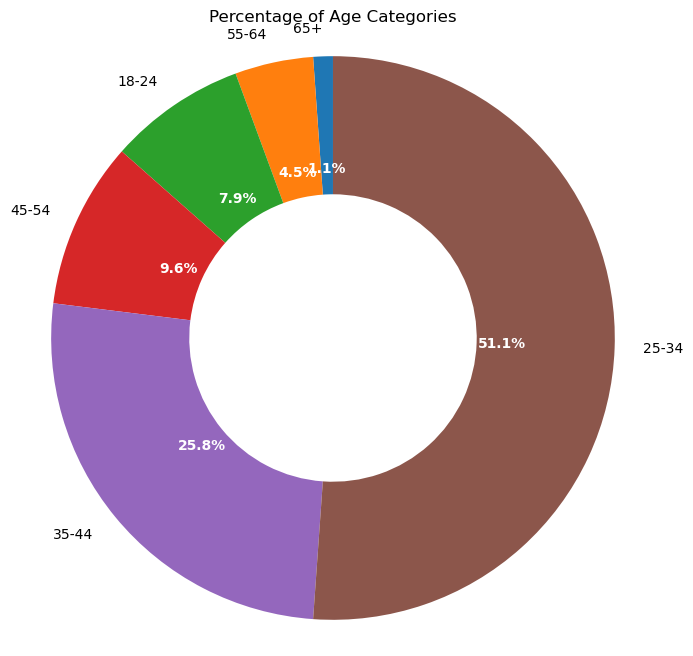

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
data_age = {
    'Age': ['25-34', '35-44', '45-54', '18-24', '55-64', '65+'],
    'Percentage': [51.123596, 25.842697, 9.550562, 7.865169, 4.494382, 1.123596]
}

# Convert data to a DataFrame
df = pd.DataFrame(data_age)

# Sort the DataFrame by Percentage in descending order
sorted_df = df.sort_values(by='Percentage', ascending=True)

# Create a donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sorted_df['Percentage'], labels=sorted_df['Age'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.49))
plt.setp(autotexts, size=10, weight="bold", color="white")  # Adjust font properties of autopct labels

# Draw a circle at the center of the donut chart to make it a donut chart
center_circle = plt.Circle((0, 0), 0.2, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Percentage of Age Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

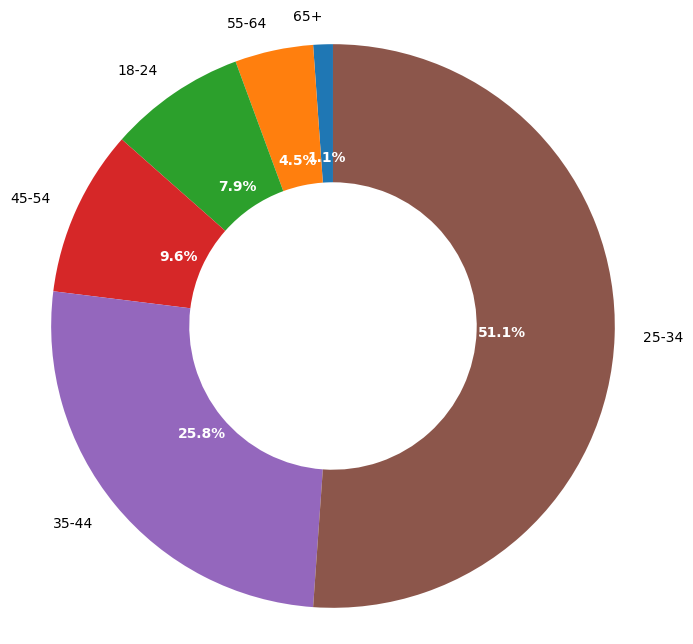

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
data_age = {
    'Age': ['25-34', '35-44', '45-54', '18-24', '55-64', '65+'],
    'Percentage': [51.123596, 25.842697, 9.550562, 7.865169, 4.494382, 1.123596]
}

# Convert data to a DataFrame
df = pd.DataFrame(data_age)

# Sort the DataFrame by Percentage in descending order
sorted_df = df.sort_values(by='Percentage', ascending=True)

# Create a donut chart
plt.figure(figsize=(8, 8))

# Using 'tab10' colormap
colors = plt.cm.tab10(range(len(sorted_df)))

wedges, texts, autotexts = plt.pie(sorted_df['Percentage'], labels=sorted_df['Age'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.49), colors=colors)
plt.setp(autotexts, size=10, weight="bold", color="white")  # Adjust font properties of autopct labels

# Draw a circle at the center of the donut chart to make it a donut chart
center_circle = plt.Circle((0, 0), 0.2, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [38]:
import pandas as pd
from scipy.stats import spearmanr
from tabulate import tabulate

# Read the data
df = pd.read_csv('./cleandata.csv')

# Assuming df is your DataFrame
selected_variables = ['Age', 'AVG-ATT', 'BEH-take_part', 'BEH-passenger-usage', 'BEH-driver-usage', 'INT-passenger', 'INT-driver']
df_selected = df[selected_variables]

# Convert 'Age' to a categorical data type with an ordinal order
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_selected['Age'] = pd.Categorical(df_selected['Age'], categories=age_categories, ordered=True)

# Calculate Spearman correlation matrix
correlation_matrix, p_values = spearmanr(df_selected, nan_policy='omit')

# Print the variable names, correlation coefficients, and p-values
for i, var1 in enumerate(selected_variables):
    for j, var2 in enumerate(selected_variables):
        if i < j:  # To avoid printing duplicate pairs
            print(f"{var1} - {var2}:")
            print(f"Spearman correlation coefficient: {correlation_matrix[i, j]:.2f}")
            print(f"P-value: {p_values[i, j]:.3f}")
            print()

# Save the cleaned DataFrame to cleandata.csv
age_summary_df.to_csv('age.csv', index=False)
print("\nDataFrame has been saved as age.csv")


Age - AVG-ATT:
Spearman correlation coefficient: -0.08
P-value: 0.268

Age - BEH-take_part:
Spearman correlation coefficient: -0.20
P-value: 0.008

Age - BEH-passenger-usage:
Spearman correlation coefficient: -0.09
P-value: 0.244

Age - BEH-driver-usage:
Spearman correlation coefficient: 0.03
P-value: 0.655

Age - INT-passenger:
Spearman correlation coefficient: -0.20
P-value: 0.007

Age - INT-driver:
Spearman correlation coefficient: -0.13
P-value: 0.085

AVG-ATT - BEH-take_part:
Spearman correlation coefficient: 0.24
P-value: 0.002

AVG-ATT - BEH-passenger-usage:
Spearman correlation coefficient: 0.25
P-value: 0.001

AVG-ATT - BEH-driver-usage:
Spearman correlation coefficient: 0.16
P-value: 0.036

AVG-ATT - INT-passenger:
Spearman correlation coefficient: 0.32
P-value: 0.000

AVG-ATT - INT-driver:
Spearman correlation coefficient: 0.34
P-value: 0.000

BEH-take_part - BEH-passenger-usage:
Spearman correlation coefficient: 0.57
P-value: 0.000

BEH-take_part - BEH-driver-usage:
Spearma

/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_45772/1429840216.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Age'] = pd.Categorical(df_selected['Age'], categories=age_categories, ordered=True)


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
from tabulate import tabulate
# Read the data
df = pd.read_csv('./cleandata.csv')

# Assuming df is your DataFrame
selected_variables = ['Age', 'AVG-ATT', 'BEH-take_part', 'BEH-passenger-usage', 'BEH-driver-usage', 'INT-passenger', 'INT-driver']
df_selected = df[selected_variables]

# Convert 'Age' to a categorical data type with an ordinal order
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_selected['Age'] = pd.Categorical(df_selected['Age'], categories=age_categories, ordered=True)

# Calculate Spearman correlation matrix
correlation_matrix, p_values = spearmanr(df_selected, nan_policy='omit')

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Spearman Correlation', 'P-value'])

# Print the variable names, correlation coefficients, and p-values
for i, var1 in enumerate(selected_variables):
    for j, var2 in enumerate(selected_variables):
        if i < j:  # To avoid printing duplicate pairs
            correlation_value = correlation_matrix[i, j]
            p_value = p_values[i, j]
            results_df = results_df.append({'Variable 1': var1, 'Variable 2': var2, 'Spearman Correlation': correlation_value, 'P-value': p_value}, ignore_index=True)

# Determine significance level
            significance = ""
            if p_value < 0.05:
                significance = "*"
            if p_value < 0.01:
                significance = "**"
            if p_value < 0.001:
                significance = "***"
            
            results_df = results_df.append({'Variable 1': var1, 'Variable 2': var2, 'Spearman Correlation': correlation_value, 'P-value': p_value, 'Significance': significance}, ignore_index=True)

# Print the results as a table
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save the results to a CSV file
results_df.to_csv('age_spearman_results.csv', index=False)


RESIDENCE

In [16]:
# Define the countries to be grouped as 'Other'
other_countries = ['Poland', 'Bulgaria', 'United States of America', 'Spain', 'Ireland', 'Brazil', 'Serbia', 
                   'United Kingdom of Great Britain and Northern Ireland', 'Sweden', 'Austria', 'Mexico', 
                   'Luxembourg', 'Latvia', 'Estonia', 'Czech Republic', 'Canada', 'Lithuania', 'Netherlands']

# Calculate the frequency of values in the "Residency" column
residence_frequency = df['Residence'].value_counts()

# Group 'Other' countries and sum their frequencies
other_frequency = residence_frequency[other_countries].sum()
residence_frequency_grouped = residence_frequency.drop(other_countries)
residence_frequency_grouped['Other'] = other_frequency

# Calculate the percentage of frequency
residence_percentage = (residence_frequency_grouped / len(df)) * 100

# Calculate the cumulative percentage
cumulative_percentage = residence_percentage.cumsum()

# Create a DataFrame with Residence, Frequency, Percentage, and Cumulative Percentage
residence_summary_df = pd.DataFrame({'Residence': residence_frequency_grouped.index, 
                                     'Frequency': residence_frequency_grouped.values, 
                                     'Percentage': residence_percentage.values, 
                                     'Cumulative Percentage': cumulative_percentage.values})

# Print the results
print("Frequency, Percentage, and Cumulative Percentage of Residence:")
print(residence_summary_df)

# Save the cleaned DataFrame to csv
residence_summary_df.to_csv('residence.csv', index=False)
print("\nDataFrame has been saved as residence.csv")



Frequency, Percentage, and Cumulative Percentage of Residence:
  Residence  Frequency  Percentage  Cumulative Percentage
0  Slovenia         63   35.393258              35.393258
1   Germany         58   32.584270              67.977528
2   Finland         18   10.112360              78.089888
3   Croatia          8    4.494382              82.584270
4     Other         31   17.415730             100.000000

DataFrame has been saved as residence.csv


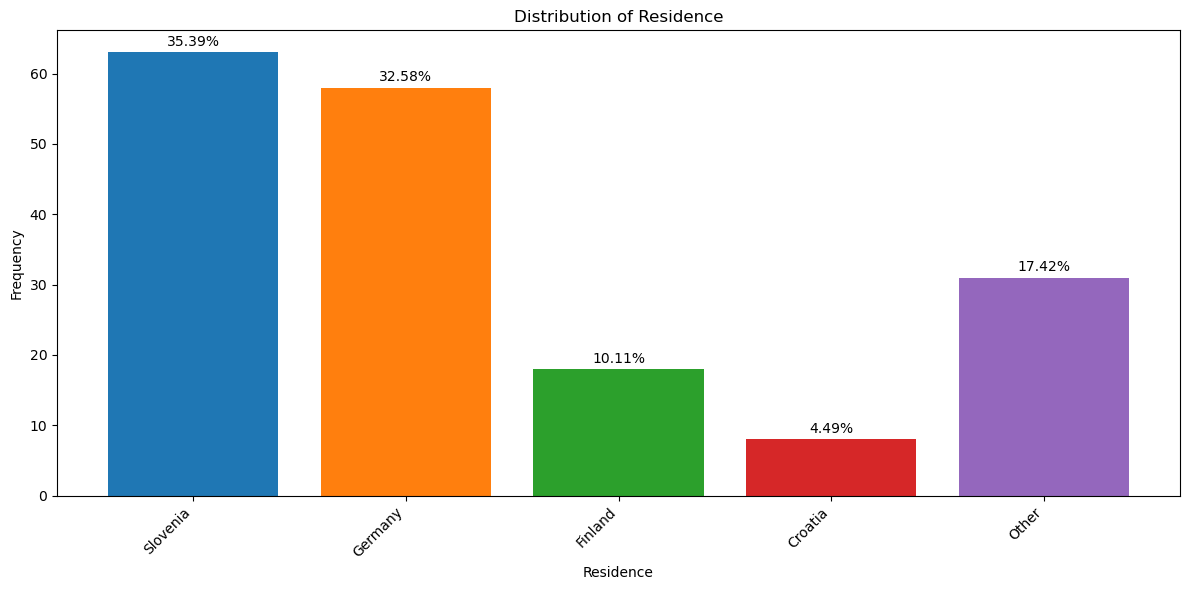

In [28]:

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Using 'tab10' colormap
colors = plt.cm.tab10(range(len(residence_summary_df)))

bars = plt.bar(residence_summary_df['Residence'], residence_summary_df['Frequency'], color=colors)

plt.xlabel('Residence')
plt.ylabel('Frequency')
plt.title('Distribution of Residence')

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, residence_summary_df['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

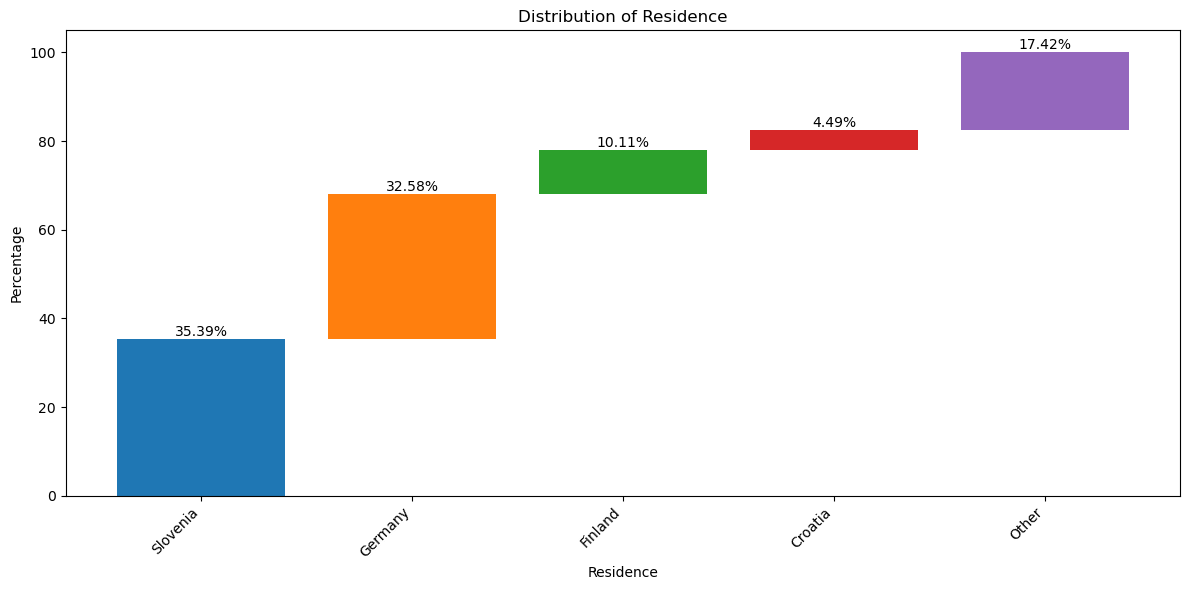

In [34]:
# Calculate cumulative sum
cumulative_percentage = residence_summary_df['Percentage'].cumsum()

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))

# Using 'tab10' colormap
colors = plt.cm.tab10(range(len(residence_summary_df)))

bottom_pos = 0
for i in range(len(residence_summary_df)):
    plt.bar(residence_summary_df['Residence'][i], residence_summary_df['Percentage'][i], color=colors[i], bottom=bottom_pos)
    bottom_pos += residence_summary_df['Percentage'][i]

plt.xlabel('Residence')
plt.ylabel('Percentage')
plt.title('Distribution of Residence')

# Add percentage labels on top of the bars
for i, percentage in enumerate(residence_summary_df['Percentage']):
    plt.text(i, cumulative_percentage[i], f'{percentage:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

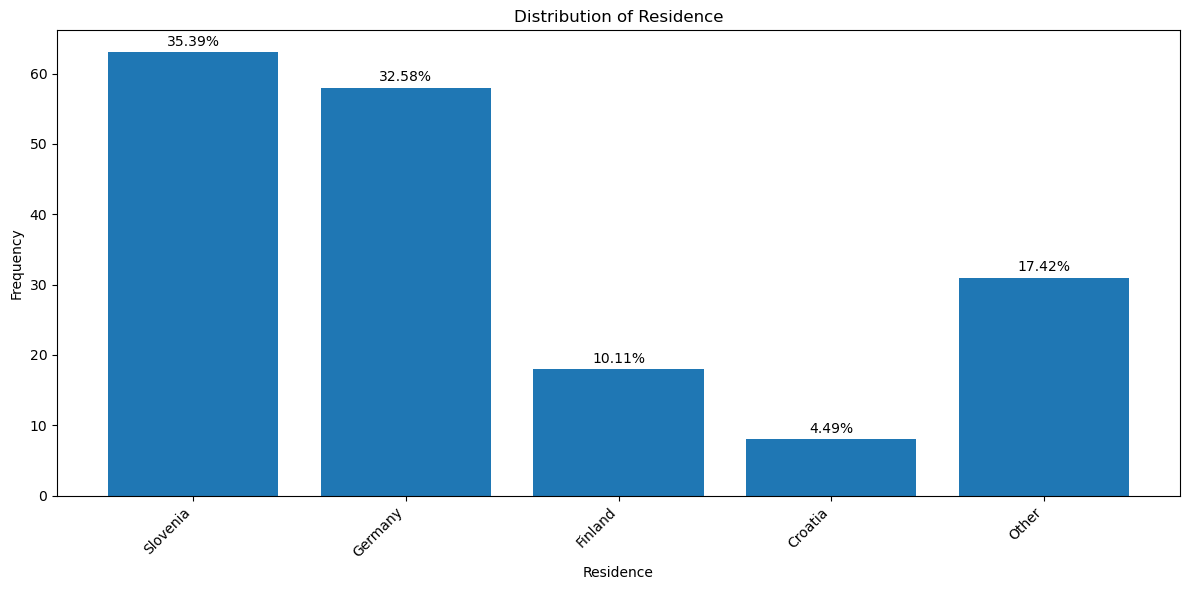

In [26]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(residence_summary_df['Residence'], residence_summary_df['Frequency'])
plt.xlabel('Residence')
plt.ylabel('Frequency')
plt.title('Distribution of Residence')

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, residence_summary_df['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


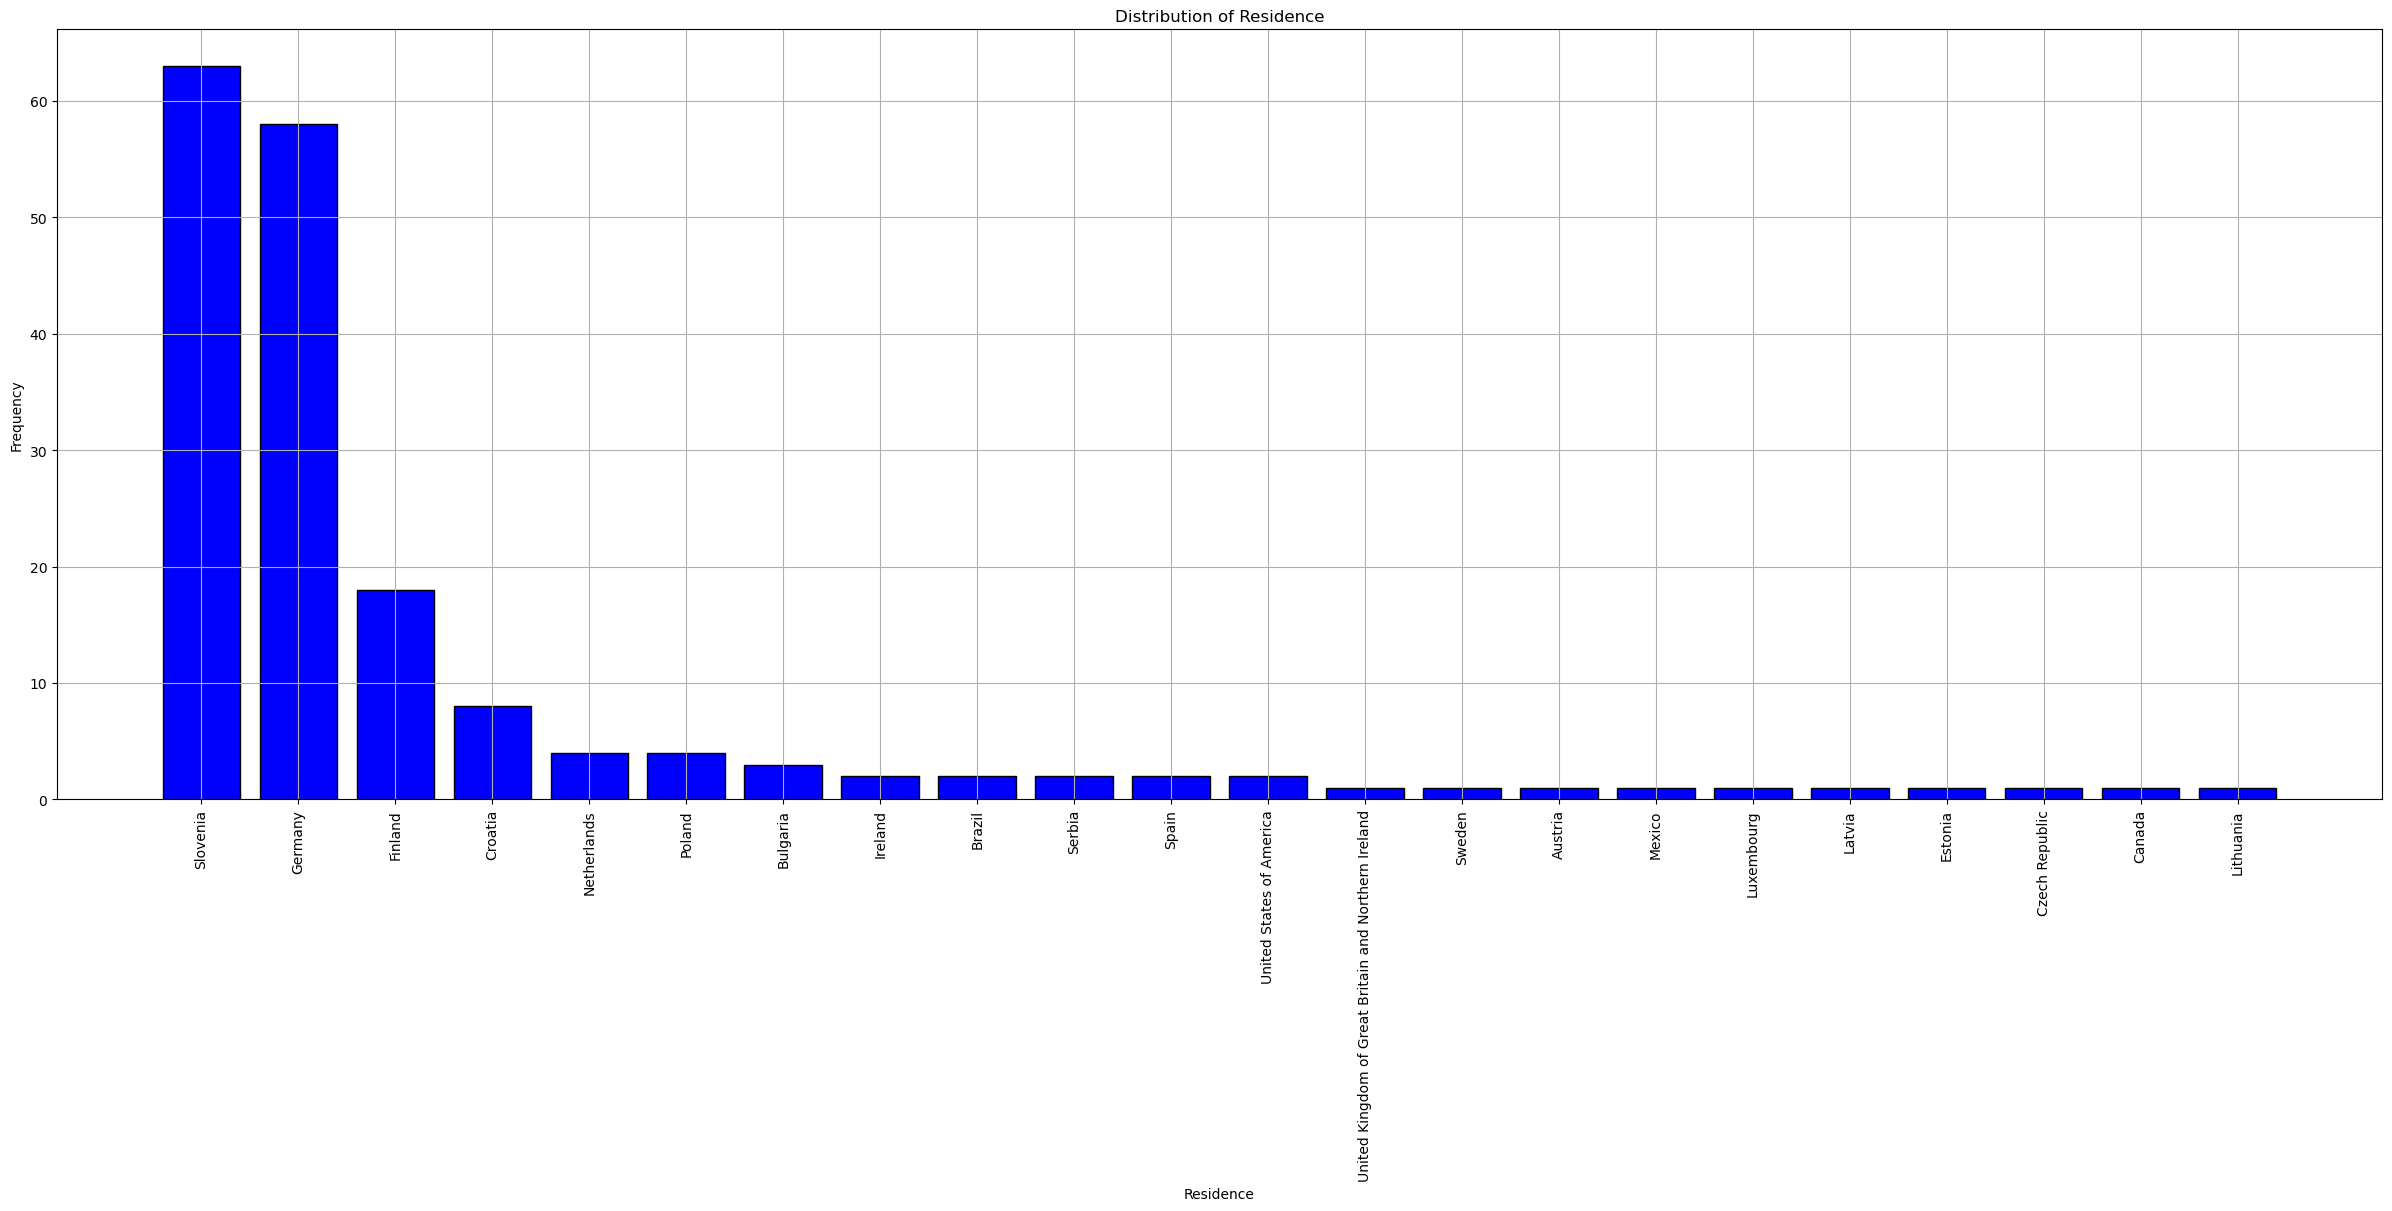

In [56]:
# Calculate the frequency of values in the "Residency" column
residence_frequency = df_sorted['Residence'].value_counts()

# Sort the values in descending order
residence_frequency = residence_frequency.sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(30, 10))
plt.bar(residence_frequency.index, residence_frequency.values, color='blue', edgecolor='black')
plt.title('Distribution of Residence')
plt.xlabel('Residence')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.grid(True)
plt.show()

In [8]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming df is your DataFrame
selected_countries = ['Slovenia', 'Germany']
numerical_variables = ['AVG-ATT', 'BEH-take_part', 'BEH-passenger-usage', 'BEH-driver-usage', 'INT-passenger', 'INT-driver']

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Variable', 't-statistic', 'P-value'])

# Perform independent samples t-test for each variable
for variable in numerical_variables:
    data_slovenia = df[df['Residence'] == 'Slovenia'][variable]
    data_germany = df[df['Residence'] == 'Germany'][variable]

    # Perform independent samples t-test
    stat, p_value = ttest_ind(data_slovenia, data_germany, equal_var=True)
    
    # Determine significance level
    significance = ""
    if p_value < 0.05:
        significance = "*"
    if p_value < 0.01:
        significance = "**"
    if p_value < 0.001:
        significance = "***"

    results_df = results_df.append({'Variable': variable, 't-statistic': stat, 'P-value': p_value, 'Significance Level': significance}, ignore_index=True)

# Print the results
print("Results:")
print(results_df)

# Save the results to a CSV file
results_df.to_csv('independent_t_test_results.csv', index=False)

Results:
              Variable  t-statistic   P-value Significance Level
0              AVG-ATT    -0.796773  0.427169                   
1        BEH-take_part    -0.472806  0.637217                   
2  BEH-passenger-usage     1.463543  0.145955                   
3     BEH-driver-usage     2.912667  0.004281                 **
4        INT-passenger    -0.983552  0.327331                   
5           INT-driver    -0.201174  0.840906                   


/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_874/2385314645.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': variable, 't-statistic': stat, 'P-value': p_value, 'Significance Level': significance}, ignore_index=True)
/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_874/2385314645.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': variable, 't-statistic': stat, 'P-value': p_value, 'Significance Level': significance}, ignore_index=True)
/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_874/2385314645.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': variab

In [9]:
import pandas as pd

# Assuming df is your DataFrame
residences = ['Slovenia', 'Germany']

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Residence', 'Median BEH-driver-usage', 'Average BEH-driver-usage'])

# Calculate median and average for each residence
for residence in residences:
    data_residence = df[df['Residence'] == residence]['BEH-driver-usage']
    median_value = data_residence.median()
    average_value = data_residence.mean()
    
    results_df = results_df.append({'Residence': residence, 'Median BEH-driver-usage': median_value, 'Average BEH-driver-usage': average_value}, ignore_index=True)

# Print the results as a table
print(results_df)

# Save the results to a CSV file
results_df.to_csv('residents_driver.csv', index=False)

  Residence  Median BEH-driver-usage  Average BEH-driver-usage
0  Slovenia                      1.0                  1.396825
1   Germany                      1.0                  1.103448


/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_874/1270760470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Residence': residence, 'Median BEH-driver-usage': median_value, 'Average BEH-driver-usage': average_value}, ignore_index=True)
/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_874/1270760470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Residence': residence, 'Median BEH-driver-usage': median_value, 'Average BEH-driver-usage': average_value}, ignore_index=True)


NUMERICAL VARIABLE

In [ ]:
numeric_variables = df.select_dtypes(include='number').columns

# Print the list of numeric variables
print("Numeric Variables:")
for variable in numeric_variables:
    print(variable)

In [ ]:
# Display basic statistics
print("Descriptive Statistics:")
print(df.describe())

describe_df = df.describe()

# Save the results to a CSV file
describe_df.to_csv('describe.csv', index=False)




In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from tabulate import tabulate

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Create a matrix to store p-values
p_values = np.zeros_like(correlation_matrix)

# Calculate correlation coefficients and p-values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr, p_value = pearsonr(df[correlation_matrix.columns[i]], df[correlation_matrix.columns[j]])
        correlation_matrix.iloc[i, j] = corr
        p_values[i, j] = p_value

# Create a DataFrame for p-values
p_values_df = pd.DataFrame(p_values, index=correlation_matrix.columns, columns=correlation_matrix.columns)

# Create a table with correlation coefficients and p-values
table_data = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_coefficient = correlation_matrix.iloc[i, j]
        p_value = p_values_df.iloc[i, j]
        significance = ""
        
        if p_value < 0.05:
            significance = "*"
        if p_value < 0.01:
            significance = "**"
        if p_value < 0.001:
            significance = "***"
            

        table_data.append([correlation_matrix.columns[i], correlation_matrix.columns[j],
                           correlation_coefficient, p_value, significance])

# Create a DataFrame
headers = ["Variable 1", "Variable 2", "Correlation Coefficient", "P-Value", "Significance"]
correlation_df = pd.DataFrame(table_data, columns=headers)

# Print the table
print(tabulate(correlation_df, headers="keys", tablefmt="pretty"))

# Save the DataFrame to a CSV file
output_csv = "correlation_table.csv"
correlation_df.to_csv(output_csv, index=False)

print(f"\nDataFrame saved to {output_csv}")

Correlation matrix but only significant correlations

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from tabulate import tabulate

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Create a matrix to store p-values
p_values = np.zeros_like(correlation_matrix)

# Calculate correlation coefficients and p-values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr, p_value = pearsonr(df[correlation_matrix.columns[i]], df[correlation_matrix.columns[j]])
        correlation_matrix.iloc[i, j] = corr
        p_values[i, j] = p_value

# Create a DataFrame for p-values
p_values_df = pd.DataFrame(p_values, index=correlation_matrix.columns, columns=correlation_matrix.columns)

# Create a table with correlation coefficients and p-values
table_data = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_coefficient = correlation_matrix.iloc[i, j]
        p_value = p_values_df.iloc[i, j]
        significance = ""
        
        if p_value < 0.05:
            significance = "*"
        if p_value < 0.01:
            significance = "**"
        if p_value < 0.001:
            significance = "***"

        if significance:
            table_data.append([correlation_matrix.columns[i], correlation_matrix.columns[j],
                               correlation_coefficient, p_value, significance])

# Create a DataFrame
headers = ["Variable 1", "Variable 2", "Correlation Coefficient", "P-Value", "Significance"]
correlation_df = pd.DataFrame(table_data, columns=headers)

# Print the table
print(tabulate(correlation_df, headers="keys", tablefmt="pretty"))

# Save the DataFrame to a CSV file
output_csv = "significant_correlation_table.csv"
correlation_df.to_csv(output_csv, index=False)

print(f"\nDataFrame saved to {output_csv}")


Correlation Matrix:
                          AVG-V-Self-Enhacemen  AVG-V-Openness_to_change  \
AVG-V-Self-Enhacemen                  1.000000                  0.288772   
AVG-V-Openness_to_change              0.288772                  1.000000   
AVG-V-Self_transcendence              0.090270                  0.371308   
AVG-V-Conservation                    0.162263                  0.126516   
AVG-P-Extraversion                    0.198271                  0.033338   
AVG-P-Honesty-Humility               -0.236852                  0.000797   
AVG-ATT                              -0.031729                  0.044919   
BEH-take_part                        -0.041962                  0.004734   
BEH-passenger-usage                   0.007522                  0.066437   
BEH-driver-usage                      0.061574                  0.037192   
INT-passenger                         0.049197                  0.146707   
INT-driver                           -0.043181                 -0.02

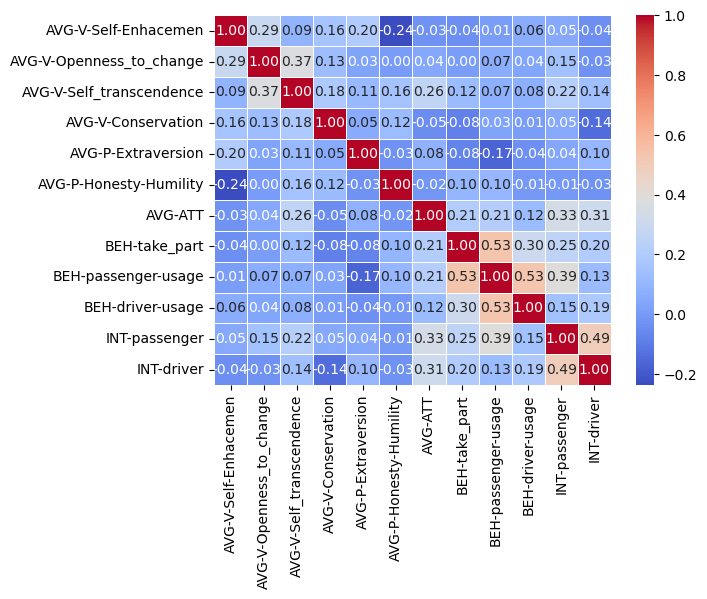

In [26]:
selected_columns = ['AVG-V-Self-Enhacemen', 'AVG-V-Openness_to_change', 'AVG-V-Self_transcendence', 'AVG-V-Conservation','AVG-P-Extraversion','AVG-P-Honesty-Humility',
 'AVG-ATT', 'BEH-take_part', 'BEH-passenger-usage', 'BEH-driver-usage', 'INT-passenger', 'INT-driver' ]


selected_df = df[selected_columns]

correlation_matrix = selected_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.show()




TEXT ANALYSIS

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


# Tokenize and process reviews to find most common words
nltk.download('punkt')
nltk.download('stopwords')

# Combine all review texts into one string
all_reviews_text = ' '.join(df_all['Review Text'])

# Tokenize words
words = word_tokenize(all_reviews_text)

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 2]

# Count the frequency of words
word_counts = Counter(filtered_words)

# Get the most common words (change the number as needed)
most_common_words = word_counts.most_common(20)

# Print the most common words
print("Most common words in reviews:")
for word, count in most_common_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt to /Users/metka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/metka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'df_all' is not defined

In [39]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
columns_to_analyze = [
    'PARTIC-YES-passenger-explanation',
    'PARTIC-YES-driver-explanation',
    'INT-passenger-explanation',
    'INT-driver-explanation'
]

# Drop null or empty values in specified columns
df_cleaned = df[columns_to_analyze].replace('', pd.NA).dropna()

# Initialize an empty list to store tokenized text from each column
all_tokens = []

# Tokenize the text from each column separately
for column in columns_to_analyze:
    column_tokens = word_tokenize(' '.join(df_cleaned[column].astype(str)))
    all_tokens.extend(column_tokens)

# Calculate word frequencies
freq_dist = FreqDist(all_tokens)

# Display the most common words and their frequencies
print("Most common words and their frequencies:")
print(freq_dist.most_common(500))



Most common words and their frequencies:
[('I', 337), ('.', 233), ('to', 201), ('a', 195), ('nan', 193), (',', 164), ('the', 147), ('and', 122), ('car', 104), ('have', 90), ('do', 84), ('not', 80), ('it', 79), ("n't", 69), ('ride', 67), ('my', 66), ('for', 64), ('is', 62), ('in', 62), ('would', 56), ('of', 54), ('with', 49), ('like', 42), ('be', 39), ('if', 36), ('It', 33), ('people', 32), ('public', 31), ('so', 31), ('i', 31), ('need', 31), ('own', 31), ('sharing', 29), ('or', 29), ('drive', 29), ('as', 28), ('on', 28), ('that', 28), ('money', 28), ('time', 27), ('driving', 27), ('way', 26), (')', 25), ("'s", 25), ('cheaper', 24), ('travel', 24), ('share', 23), ('transport', 22), ('this', 21), ('me', 20), ('no', 20), ('more', 19), ('good', 18), ('take', 18), ('but', 18), ('from', 18), ('was', 17), ('use', 17), ('we', 17), ('get', 17), ('If', 17), ('friends', 16), ('driver', 16), ('can', 16), ('someone', 16), ('transportation', 16), ('same', 15), ('(', 15), ('option', 15), ('who', 15),

In [42]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Assuming df is your DataFrame
columns_to_analyze = [
    'PARTIC-YES-passenger-explanation',
    'PARTIC-YES-driver-explanation',
    'INT-passenger-explanation',
    'INT-driver-explanation'
]

# Drop null or empty values in specified columns
df_cleaned = df[columns_to_analyze].replace('', pd.NA).dropna()

# Initialize an empty list to store tokenized text from each column
all_tokens = []

# Tokenize the text from each column separately
for column in columns_to_analyze:
    column_tokens = word_tokenize(' '.join(df_cleaned[column].astype(str)))
    all_tokens.extend(column_tokens)

# Calculate word frequencies
freq_dist = FreqDist(all_tokens)

# Create a DataFrame from the frequency distribution
word_counts_df = pd.DataFrame(list(freq_dist.items()), columns=['Word', 'Count'])

# Sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Display the most common words and their frequencies
print("Most common words and their frequencies:")
print(word_counts_df.head(500))

# Save the DataFrame to a CSV file
output_csv = "word_counts.csv"
word_counts_df.to_csv(output_csv, index=False)

print(f"\nDataFrame saved to {output_csv}")

Most common words and their frequencies:
          Word  Count
23           I    337
17           .    233
5           to    201
21           a    195
18         nan    193
..         ...    ...
309         us      2
135    easiest      2
80      booked      1
886  occasions      1
924     picked      1

[500 rows x 2 columns]

DataFrame saved to word_counts.csv
